In [1]:
import os,sys
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pickle

In [2]:
import PyComplexHeatmap
from PyComplexHeatmap import *

In [3]:
plt.rcParams['figure.dpi'] = 300

In [7]:
import pandas as pd
df = pd.read_csv('Alldata_methods_frac_correct_direction_20.csv')

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
colors_1 = ["#157397", "#FFFFFF", "#FA6D40"] # E59A9D
colors_2 = ["#157397", "#FFFFFF", "#E59A9D"]
colors_3 = ["#6a51a4", "#FFFFFF", "#e55b32"]
colors_4 = ["#408094", "#FFFFFF", "#C65B3F"]#C65B3F#408094
custom_cmap1 = LinearSegmentedColormap.from_list(name='custom1', colors=colors_1)
custom_cmap2 = LinearSegmentedColormap.from_list(name='custom2', colors=colors_2)
custom_cmap3 = LinearSegmentedColormap.from_list(name='custom3', colors=colors_3)
custom_cmap4 = LinearSegmentedColormap.from_list(name='custom4', colors=colors_4)
matplotlib.colormaps.register(custom_cmap4)
matplotlib.colormaps.register(custom_cmap1)
matplotlib.colormaps.register(custom_cmap2)
matplotlib.colormaps.register(custom_cmap3)

In [6]:
names = ['AdamsonWeissman2016_GSM2406675_1', 'AdamsonWeissman2016_GSM2406677_2', 'AdamsonWeissman2016_GSM2406681_3', 
         'DatlingerBock2017_stimulated', 'DatlingerBock2017_unstimulated', 'DatlingerBock2021_stimulated', 
         'DatlingerBock2021_unstimulated', 'Dixit_combined', 'Dixit_GSM2396858', 'Dixit_GSM2396861', 
         'NormanWeissman2019', 'PapalexiSatija2021_eccite_arrayed_RNA', 'PapalexiSatija2021_eccite_RNA', 
         'Replogle_k562_essential', 'Replogle_rpe1_essential', 'ShifrutMarson2018', 'TianKampmann2019_day7neuron', 
         'TianKampmann2019_iPSC', 'TianKampmann2021_CRISPRa', 'TianKampmann2021_CRISPRi', 'XuCao2023']

### AdamsonWeissman2016_GSM2406675_1

In [8]:
filtered_df = df[df['Dataset'] == 'AdamsonWeissman2016_GSM2406675_1']
filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)

/tmp/ipykernel_2726301/115195841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)


In [9]:
pivot_df = filtered_df.pivot(index='Unique_Perturbed_Gene', columns='Method', values='frac_correct_direction_20')
pivot_df.fillna('', inplace=True)

In [10]:
pivot_df

Method                 attnpert   cpa  gears  gears_esm   grn  new_GenePT  \
Unique_Perturbed_Gene                                                       
BHLHE40+ctrl_2             0.85  0.55   0.60       0.55  0.75        0.50   
BHLHE40+ctrl_3             0.85  0.50   0.80       0.80  0.75        0.70   
DDIT3+ctrl_3               0.70  0.60   0.70       0.70  0.50        0.70   
DDIT3+ctrl_4               0.95  0.35   0.85       0.85  0.60        0.90   
EP300+ctrl_1               0.80  0.45   0.65       0.80  0.15        0.60   
EP300+ctrl_5               0.55  0.45   0.50       0.65  0.70        0.60   
SPI1+ctrl_1                0.70  0.55   0.70       0.55  0.40        0.50   
SPI1+ctrl_2                0.55  0.55   0.45       0.45  0.45        0.50   
SPI1+ctrl_4                0.60  0.35   0.55       0.50  0.45        0.55   
SPI1+ctrl_5                0.50  0.55   0.65       0.50  0.45        0.45   

Method                 new_geneformer  new_scbert  no_perturb  scELMo_GPT35  \
Unique_Perturbed_Gene                                                         
BHLHE40+ctrl_2                   0.55        0.55        0.50          0.60   
BHLHE40+ctrl_3                   0.65        0.65        0.50          0.60   
DDIT3+ctrl_3                     0.75        0.70        0.45          0.75   
DDIT3+ctrl_4                     0.90        0.75        0.45          0.85   
EP300+ctrl_1                     0.60        0.55        0.50          0.70   
EP300+ctrl_5                     0.65        0.60        0.50          0.75   
SPI1+ctrl_1                      0.60        0.45        0.55          0.55   
SPI1+ctrl_2                      0.65        0.55        0.55          0.55   
SPI1+ctrl_4                      0.50        0.55        0.55          0.70   
SPI1+ctrl_5                      0.60        0.55        0.55          0.55   

Method                 scfoundation  scgpt  sclong  
Unique_Perturbed_Gene                               
BHLHE40+ctrl_2                 0.55   0.75    0.75  
BHLHE40+ctrl_3                 0.55   0.75    0.75  
DDIT3+ctrl_3                   0.40   0.60    0.75  
DDIT3+ctrl_4                   0.55   0.95    0.90  
EP300+ctrl_1                   0.65   0.90    0.80  
EP300+ctrl_5                   0.70   0.90    0.80  
SPI1+ctrl_1                    0.70   0.65    0.55  
SPI1+ctrl_2                    0.60   0.70    0.55  
SPI1+ctrl_4                    0.75   0.80    0.70  
SPI1+ctrl_5                    0.70   0.70    0.55

In [11]:
long_df = pd.melt(pivot_df.reset_index(), 
                  id_vars='Unique_Perturbed_Gene', 
                  var_name='Method',
                  value_name='frac_correct_direction_20')

#long_df.rename(columns={'index': 'Perturbed_Gene'}, inplace=True)

In [12]:
long_df

Unique_Perturbed_Gene    Method  frac_correct_direction_20
0          BHLHE40+ctrl_2  attnpert                       0.85
1          BHLHE40+ctrl_3  attnpert                       0.85
2            DDIT3+ctrl_3  attnpert                       0.70
3            DDIT3+ctrl_4  attnpert                       0.95
4            EP300+ctrl_1  attnpert                       0.80
..                    ...       ...                        ...
125          EP300+ctrl_5    sclong                       0.80
126           SPI1+ctrl_1    sclong                       0.55
127           SPI1+ctrl_2    sclong                       0.55
128           SPI1+ctrl_4    sclong                       0.70
129           SPI1+ctrl_5    sclong                       0.55

[130 rows x 3 columns]

In [13]:
plt.figure(figsize=(3.5,4))
cm = DotClustermapPlotter(data=long_df,x='Unique_Perturbed_Gene',y='Method',value='frac_correct_direction_20',
              c='frac_correct_direction_20',cmap='custom3',vmax=1,vmin=-1,s=1,marker='s',spines=False,
                         show_rownames=True,show_colnames=True,row_dendrogram=True, grid=None, col_dendrogram=True,
                         row_dendrogram_size=8, col_dendrogram_size=8)
col_dendrogram_size=8#cm.ax_heatmap.grid(which='minor',color='Black',linestyle=None,linewidth=0)
#cm.ax_heatmap.grid(False)
plt.show()

/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:356: FutureWarning: The provided callable <function mean at 0x4002b7f963a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:405: FutureWarning: The provided callable <function mean at 0x4002b7f963a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  self.kwargs["c"] = data.pivot_table(


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 222.97417035699596
Plotting legends..
Estimated legend width: 7.5 mm


### AdamsonWeissman2016_GSM2406677_2

In [17]:
filtered_df = df[df['Dataset'] == 'AdamsonWeissman2016_GSM2406677_2']
filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
pivot_df = filtered_df.pivot(index='Unique_Perturbed_Gene', columns='Method', values='frac_correct_direction_20')
pivot_df.fillna('', inplace=True)
long_df = pd.melt(pivot_df.reset_index(), 
                  id_vars='Unique_Perturbed_Gene', 
                  var_name='Method',
                  value_name='frac_correct_direction_20')
plt.figure(figsize=(7,3.5))
cm = DotClustermapPlotter(data=long_df,x='Unique_Perturbed_Gene',y='Method',value='frac_correct_direction_20',
              c='frac_correct_direction_20',cmap='custom3',vmax=1,vmin=0,s=1,marker='s',spines=True,
                         show_rownames=True,show_colnames=True,row_dendrogram=True, grid=None, col_dendrogram=True,
                         row_dendrogram_size=8, col_dendrogram_size=8)
#cm.ax_heatmap.grid(which='minor',color='Black',linestyle=None,linewidth=0)
plt.savefig("./plot/AdamsonWeissman2016_GSM2406677_2_corret_direction20.pdf", format="pdf", bbox_inches='tight')
#cm.ax_heatmap.grid(False)
plt.show()

/tmp/ipykernel_2726301/3024758205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:356: FutureWarning: The provided callable <function mean at 0x4002b7f963a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:405: FutureWarning: The provided callable <function mean

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 164.03350363413912
Plotting legends..
Estimated legend width: 7.5 mm


### AdamsonWeissman2016_GSM2406681_3

/tmp/ipykernel_3190999/1017800080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:356: FutureWarning: The provided callable <function mean at 0x40032e6849d0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:405: FutureWarning: The provided callable <function mean

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 41.664439214275056
Plotting legends..
Estimated legend width: 7.5 mm


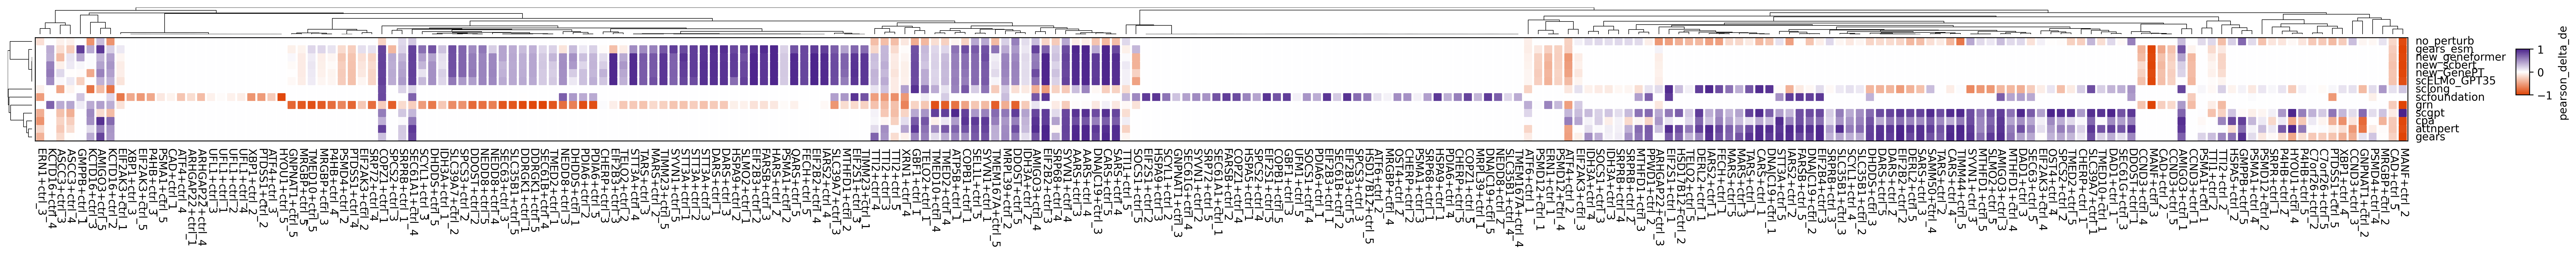

In [128]:
filtered_df = df[df['Dataset'] == 'AdamsonWeissman2016_GSM2406681_3']
filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
pivot_df = filtered_df.pivot(index='Unique_Perturbed_Gene', columns='Method', values='frac_correct_direction_20')
pivot_df.fillna(0, inplace=True)
#pivot_df.dropna(inplace=True)
long_df = pd.melt(pivot_df.reset_index(), 
                  id_vars='Unique_Perturbed_Gene', 
                  var_name='Method',
                  value_name='frac_correct_direction_20')
plt.figure(figsize=(40,2))
cm = DotClustermapPlotter(data=long_df,x='Unique_Perturbed_Gene',y='Method',value='frac_correct_direction_20',
              c='frac_correct_direction_20',cmap='custom3',vmax=1,vmin=-1,s=1,marker='s',spines=True,
                         show_rownames=True,show_colnames=True,row_dendrogram=True, grid=None, col_dendrogram=True,
                         row_dendrogram_size=8, col_dendrogram_size=8)
#cm.ax_heatmap.grid(which='minor',color='Black',linestyle=None,linewidth=0)
#cm.ax_heatmap.grid(False)
plt.show()

### NormanWeissman2019

In [56]:
filtered_df = df[df['Dataset'] == 'NormanWeissman2019']
filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
pivot_df = filtered_df.pivot(index='Unique_Perturbed_Gene', columns='Method', values='frac_correct_direction_20')
#pivot_df.fillna(0, inplace=True)
pivot_df.dropna(inplace=True)
long_df = pd.melt(pivot_df.reset_index(), 
                  id_vars='Unique_Perturbed_Gene', 
                  var_name='Method',
                  value_name='frac_correct_direction_20')
plt.figure(figsize=(40,2))
cm = DotClustermapPlotter(data=long_df,x='Unique_Perturbed_Gene',y='Method',value='frac_correct_direction_20',
              c='frac_correct_direction_20',cmap='custom',vmax=1,vmin=-1,s=1,marker='s',spines=True,
                         show_rownames=True,show_colnames=True,row_dendrogram=True)
#cm.ax_heatmap.grid(which='minor',color='Black',linestyle=None,linewidth=0)
#cm.ax_heatmap.grid(False)
plt.show()

/tmp/ipykernel_3190999/3765095295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:356: FutureWarning: The provided callable <function mean at 0x40032e6849d0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:405: FutureWarning: The provided callable <function mean

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 65.84258757535571
Plotting legends..
Estimated legend width: 7.5 mm


### Dixit_GSM2396858

/tmp/ipykernel_2726301/3857907827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:356: FutureWarning: The provided callable <function mean at 0x4002b7f963a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:405: FutureWarning: The provided callable <function mean

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 114.17403976381792
Plotting legends..
Estimated legend width: 7.5 mm


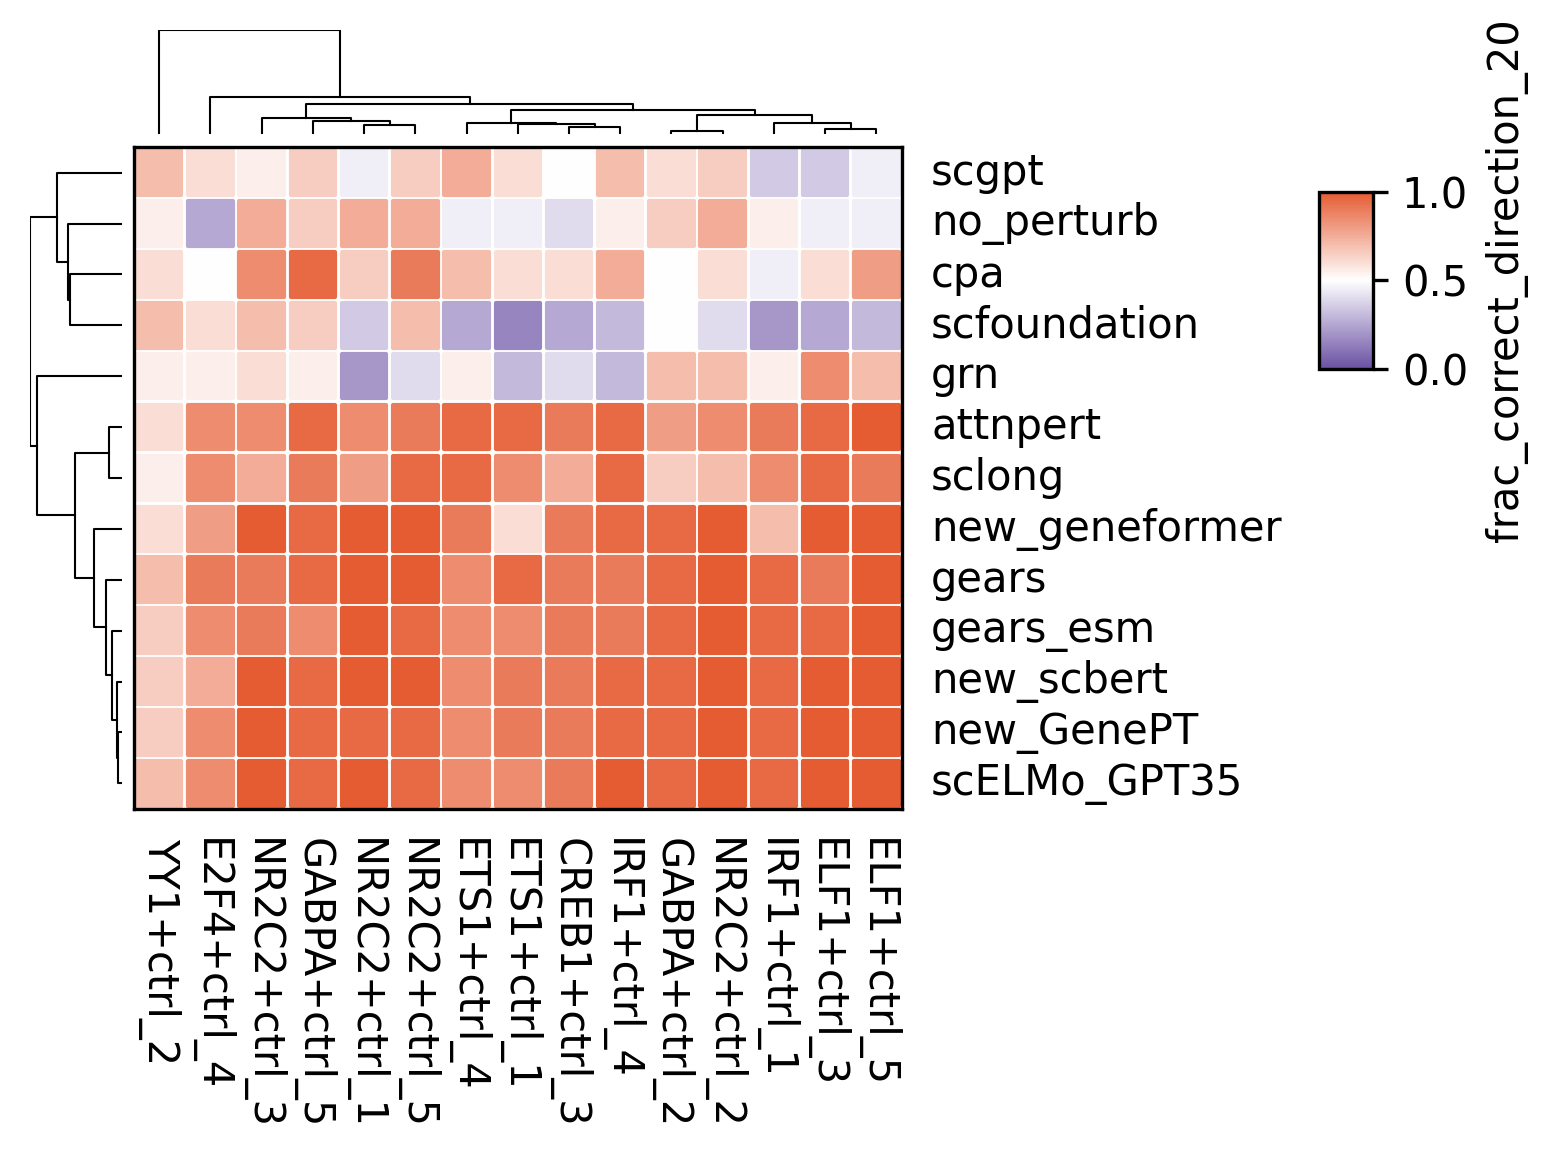

In [19]:
filtered_df = df[df['Dataset'] == 'Dixit_GSM2396858']
filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
pivot_df = filtered_df.pivot(index='Unique_Perturbed_Gene', columns='Method', values='frac_correct_direction_20')
pivot_df.fillna(0, inplace=True)
#pivot_df.dropna(inplace=True)
long_df = pd.melt(pivot_df.reset_index(), 
                  id_vars='Unique_Perturbed_Gene', 
                  var_name='Method',
                  value_name='frac_correct_direction_20')
plt.figure(figsize=(3.8,3))
cm = DotClustermapPlotter(data=long_df,x='Unique_Perturbed_Gene',y='Method',value='frac_correct_direction_20',
              c='frac_correct_direction_20',cmap='custom3',vmax=1,vmin=0,s=1,marker='s',spines=True,
                         show_rownames=True,show_colnames=True,row_dendrogram=True, grid=None, col_dendrogram=True,
                         row_dendrogram_size=8, col_dendrogram_size=8)
#cm.ax_heatmap.grid(which='minor',color='Black',linestyle=None,linewidth=0)
#cm.ax_heatmap.grid(False)
plt.savefig("./plot/Dixit_GSM2396858_correct_direction20.pdf", format="pdf", bbox_inches='tight')
plt.show()


### Dixit_GSM2396861

/tmp/ipykernel_2726301/4176123687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:356: FutureWarning: The provided callable <function mean at 0x4002b7f963a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:405: FutureWarning: The provided callable <function mean

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 114.17403976381792
Plotting legends..
Estimated legend width: 7.5 mm


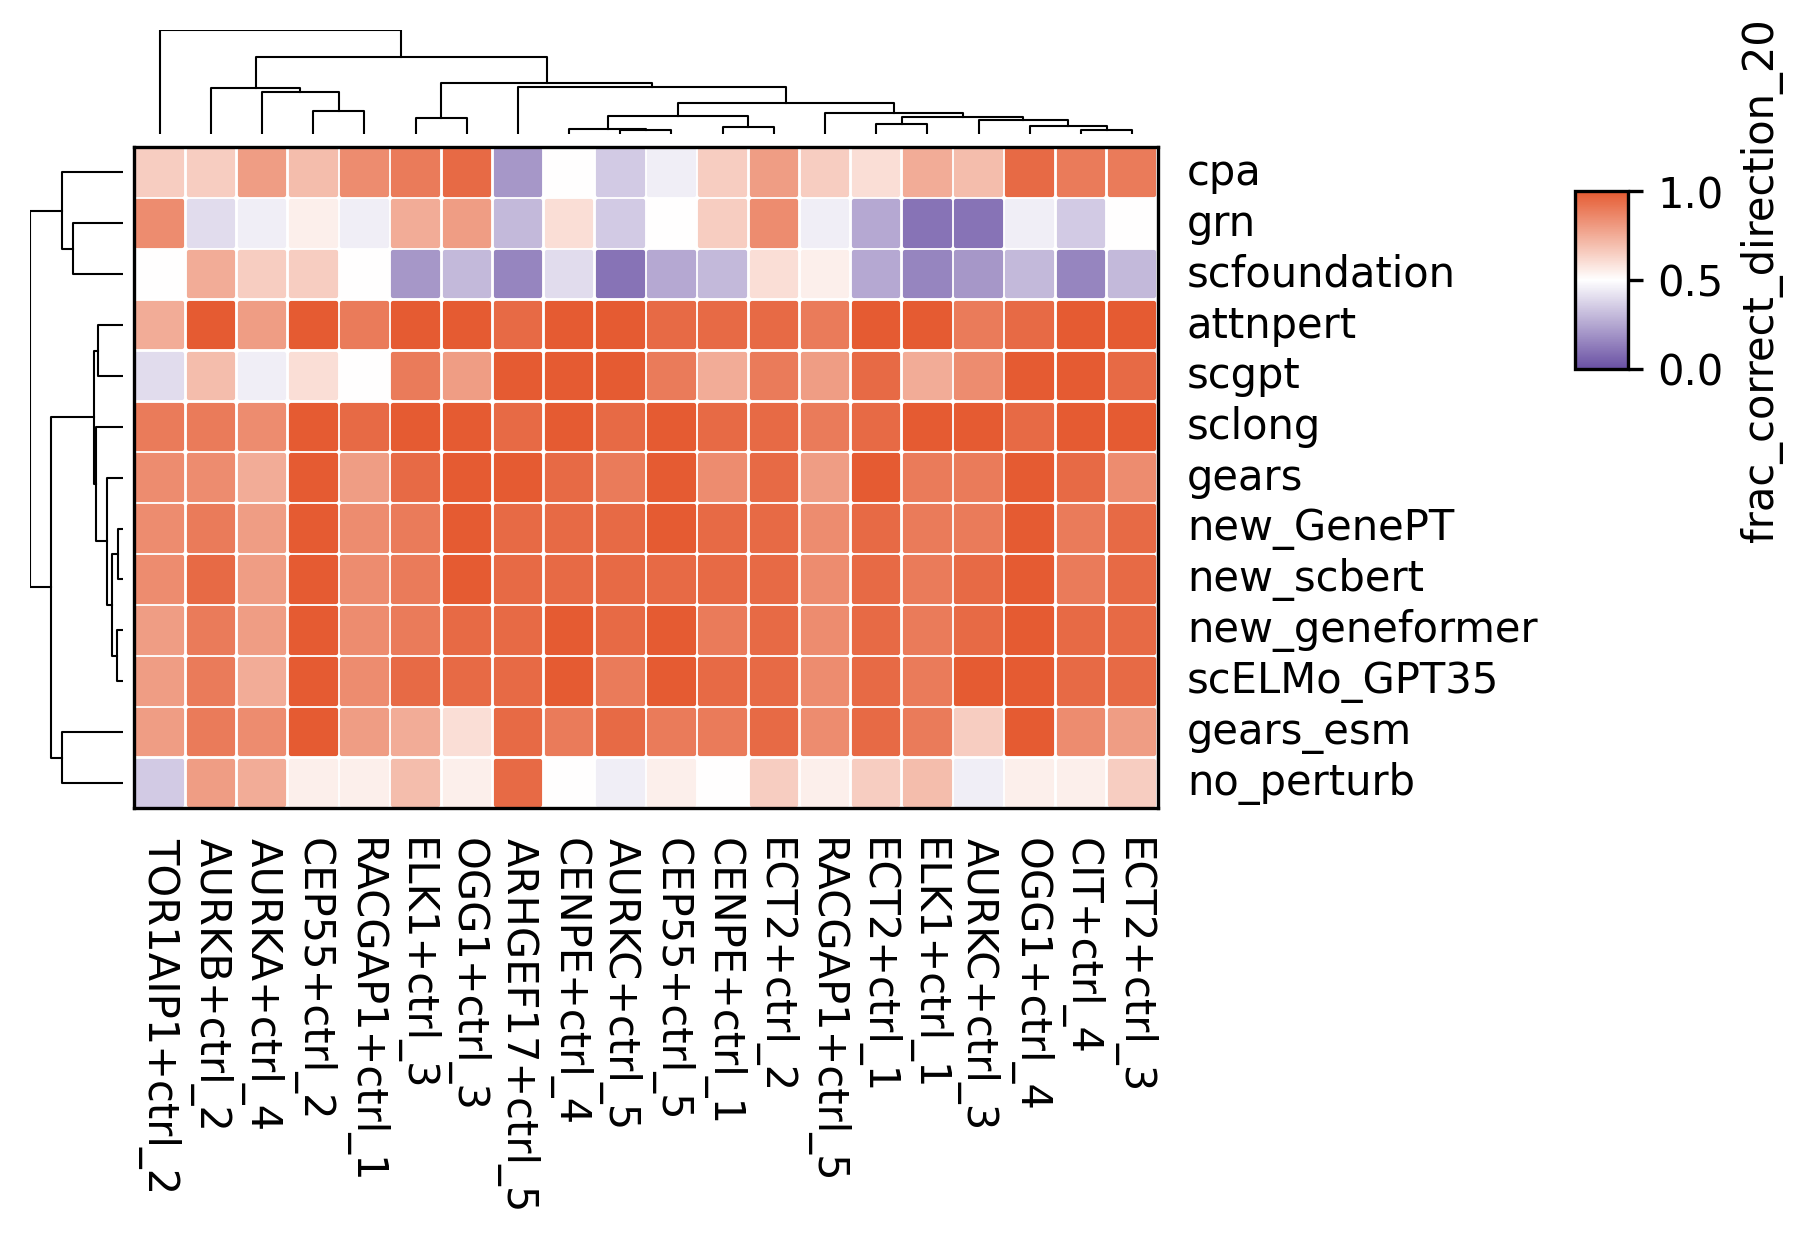

In [21]:
filtered_df = df[df['Dataset'] == 'Dixit_GSM2396861']
filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
pivot_df = filtered_df.pivot(index='Unique_Perturbed_Gene', columns='Method', values='frac_correct_direction_20')
pivot_df.fillna(0, inplace=True)
#pivot_df.dropna(inplace=True)
long_df = pd.melt(pivot_df.reset_index(), 
                  id_vars='Unique_Perturbed_Gene', 
                  var_name='Method',
                  value_name='frac_correct_direction_20')
plt.figure(figsize=(4.9,3))
cm = DotClustermapPlotter(data=long_df,x='Unique_Perturbed_Gene',y='Method',value='frac_correct_direction_20',
              c='frac_correct_direction_20',cmap='custom3',vmax=1,vmin=0,s=1,marker='s',spines=True,
                         show_rownames=True,show_colnames=True,row_dendrogram=True, grid=None, col_dendrogram=True,
                         row_dendrogram_size=8, col_dendrogram_size=8)
#cm.ax_heatmap.grid(which='minor',color='Black',linestyle=None,linewidth=0)
#cm.ax_heatmap.grid(False)
plt.savefig("./plot/Dixit_GSM2396861_correct_direction20.pdf", format="pdf", bbox_inches='tight')
plt.show()

### Dixit_combined

/tmp/ipykernel_2726301/3030246570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:356: FutureWarning: The provided callable <function mean at 0x4002b7f963a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:405: FutureWarning: The provided callable <function mean

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 114.17403976381792
Plotting legends..
Estimated legend width: 7.5 mm


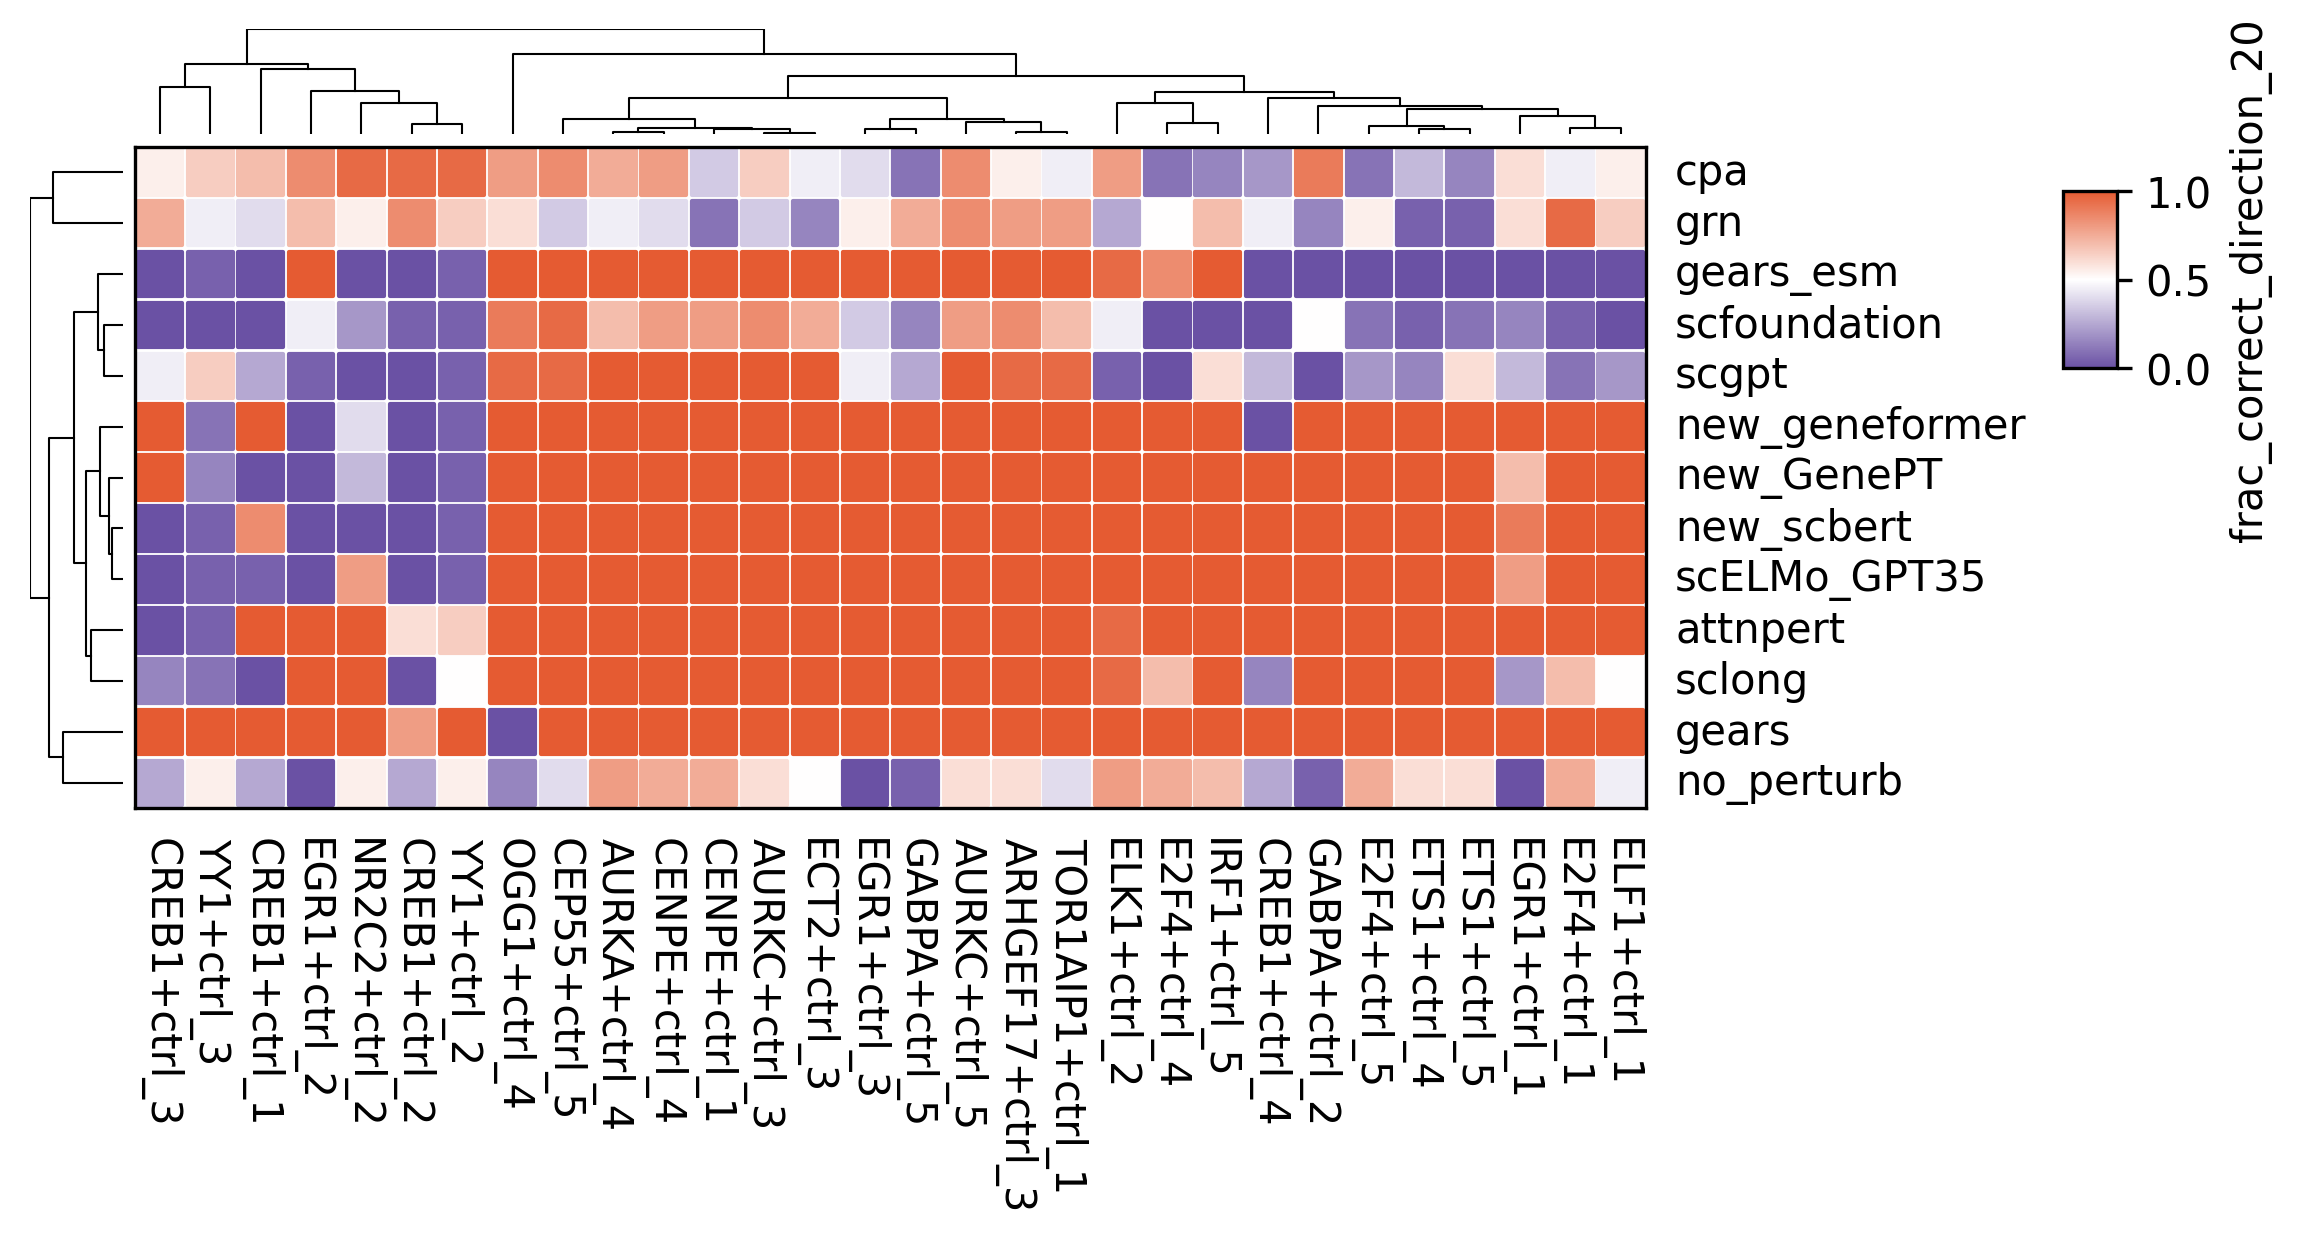

In [22]:
filtered_df = df[df['Dataset'] == 'Dixit_combined']
filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
pivot_df = filtered_df.pivot(index='Unique_Perturbed_Gene', columns='Method', values='frac_correct_direction_20')
pivot_df.fillna(0, inplace=True)
#pivot_df.dropna(inplace=True)
long_df = pd.melt(pivot_df.reset_index(), 
                  id_vars='Unique_Perturbed_Gene', 
                  var_name='Method',
                  value_name='frac_correct_direction_20')
plt.figure(figsize=(7,3))
cm = DotClustermapPlotter(data=long_df,x='Unique_Perturbed_Gene',y='Method',value='frac_correct_direction_20',
              c='frac_correct_direction_20',cmap='custom3',vmax=1,vmin=0,s=1,marker='s',spines=True,
                         show_rownames=True,show_colnames=True,row_dendrogram=True, grid=None, col_dendrogram=True,
                         row_dendrogram_size=8, col_dendrogram_size=8)
#cm.ax_heatmap.grid(which='minor',color='Black',linestyle=None,linewidth=0)
#cm.ax_heatmap.grid(False)
plt.savefig("./plot/Dixit_combined_correct_direction20.pdf", format="pdf", bbox_inches='tight')
plt.show()

In [53]:
filtered_df = df[df['Dataset'] == 'TianKampmann2021_CRISPRi']
filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
pivot_df = filtered_df.pivot(index='Unique_Perturbed_Gene', columns='Method', values='frac_correct_direction_20')
#pivot_df.fillna(0, inplace=True)
pivot_df.dropna(inplace=True)
long_df = pd.melt(pivot_df.reset_index(), 
                  id_vars='Unique_Perturbed_Gene', 
                  var_name='Method',
                  value_name='frac_correct_direction_20')
plt.figure(figsize=(23,2.9))
cm = DotClustermapPlotter(data=long_df,x='Unique_Perturbed_Gene',y='Method',value='frac_correct_direction_20',
              c='frac_correct_direction_20',cmap='custom4',vmax=1,vmin=-1,s=1,marker='s',spines=True,
                         show_rownames=True,show_colnames=True,row_dendrogram=True,
                         grid=None, col_dendrogram=True,
                         row_dendrogram_size=8, col_dendrogram_size=8, linewidths=0)
#cm.ax_heatmap.grid(which='minor',color='Black',linestyle=None,linewidth=0)
#cm.ax_heatmap.grid(False)
plt.savefig("./plot/heatmap_TianKampmann2021_CRISPRi.pdf", format="pdf", bbox_inches='tight')
plt.show()

/tmp/ipykernel_2598350/1553673070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Unique_Perturbed_Gene'] = filtered_df['Perturbed Gene'] + '_' + filtered_df['Split'].astype(str)
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:356: FutureWarning: The provided callable <function mean at 0x4001073a6310> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/share/huadjyin/home/zhoumin3/.conda/envs/gears/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:405: FutureWarning: The provided callable <function mean

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 105.29135982893338
Plotting legends..
Estimated legend width: 7.5 mm
